# KBO 외국인 투수 스카우팅 최적화

- fangraphs : 정규 시즌별 기록  
- statcast : 경기별 기록

In [3]:
import pandas as pd

atkbo_1118_kboregssn = pd.read_csv(
    'kbo_yearly_foreigners_2011_2018.csv')  # 역대 정규시즌 성적
atkbo_1118_mlbtot = pd.read_csv(
    'fangraphs_foreigners_2011_2018.csv')  # mlb에서의 성적
# 19년에 kbo에 입성한 투수들의 mlb에서의 성적
atkbo_19_mlbtot = pd.read_csv('fangraphs_foreigners_2019.csv')

In [4]:
print(atkbo_1118_kboregssn.shape)
print(atkbo_1118_mlbtot.shape)
print(atkbo_19_mlbtot.shape)

(105, 11)
(205, 19)
(41, 19)


In [5]:
print(atkbo_1118_kboregssn.columns)
print(atkbo_1118_mlbtot.columns)
print(atkbo_19_mlbtot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


In [10]:
pd.read_csv('variables.csv')

,columns_names,meaning
0,pitcher_name,투수 이름
1,year,연도
2,team,소속 팀
3,ERA,평균 자책점(Earned run average)
4,WAR,대체 선수 대비 승리 기여도(Wins above replacement)
5,TBF,상대한 타자 수(Total betters faced)
6,H,피안타 수(Hits)
7,HR,피홈런 수(Home runs)
8,BB,피볼넷 수(Bases on balls)
9,HBP,피사구 수(Hit by pitch)


              ERA         TBF
count  105.000000  105.000000
mean     4.714286  558.980952
std      1.733072  224.436816
min      2.380000   40.000000
25%      3.740000  349.000000
50%      4.420000  622.000000
75%      5.230000  758.000000
max     15.750000  870.000000


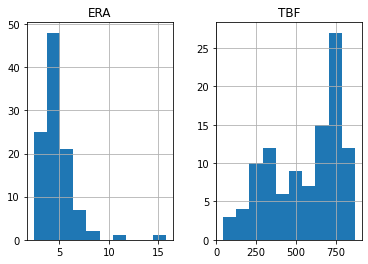

In [11]:
# kbo 정규 시즌의 ERA, TBF 확인
atkbo_1118_kboregssn[['ERA', 'TBF']].hist()
print(atkbo_1118_kboregssn[['ERA', 'TBF']].describe())

ERA의 평균은 4.71이며 왼쪽으로 치우쳐있음

TBF의 평균은 558.98이며 분포가 오른쪽으로 치우져있음

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


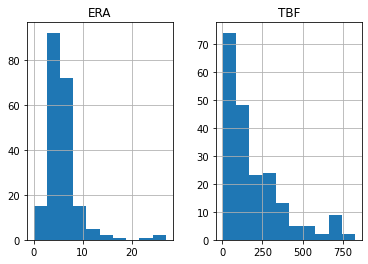

In [12]:
# mbl에서 ERA, TBF 확인
atkbo_1118_mlbtot[['ERA', 'TBF']].hist()
print(atkbo_1118_mlbtot[['ERA', 'TBF']].describe())

ERA의 평균은 5.75이며 왼쪽으로 치우쳐있음

TBF의 평균은 193.16이며 분포가 왼쪽으로 치우져있음

MLB에서 TBF의 값의 평균이 낮고 왼쪽으로 치우쳐있는 이유는 KBO의 선발 투수들이 MLB에서는 선발 투수가 아니었기 때문(주로 불펜)

투수를 평가할 때 사용할 수 있는 대표적인 지표로는 ERA가 있는데, MLB에서 ERA가 낮을수록 KBO에서도 낮을 것이라는 것이 증명된다면 외국인 투수를 선발할 때 ERA가 낮은 투수 위주로 스카우트하면 될 것이다.

In [25]:
m_mean = (atkbo_1118_mlbtot.groupby('pitcher_name')['ERA'].mean().
          reset_index().rename(columns={'ERA': 'MLB_mean'}))

k_mean = (atkbo_1118_kboregssn.groupby('pitcher_name')['ERA'].mean().
          reset_index().rename(columns={'ERA': 'KBO_mean'}))

df = pd.merge(m_mean, k_mean, how='inner', on='pitcher_name')
df

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.687500
1,다이아몬드,10.262500,4.420000
2,듀브론트,5.106667,4.920000
3,레나도,7.306667,6.800000
4,레온,6.050000,11.250000
5,레이예스,12.956667,5.695000
6,레일리,6.640000,4.197500
7,로저스,5.771667,3.690000
8,루카스,5.687143,4.930000
9,리즈,4.240000,3.543333


          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


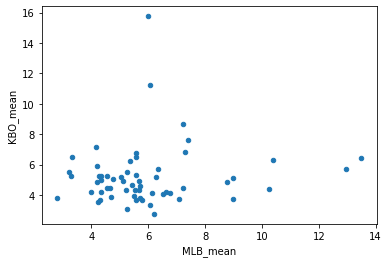

In [26]:
df.plot(kind='scatter', x='MLB_mean', y='KBO_mean')
print(df.corr())

MLB에서의 ERA로 KBO에서의 ERA를 예측하기는 어려워 보인다.

## 투수의 능력만을 반영한 새로운 지표 탐색 - Statcast

In [27]:
atkbo_1118_statcast = pd.read_csv('baseball_savant_foreigners_2011_2018.csv')
atkbo_19_statcast = pd.read_csv('baseball_savant_foreigners_2019.csv')

print(atkbo_1118_statcast.shape)
print(atkbo_19_statcast.shape)

(135753, 24)
(21903, 24)


In [29]:
print(atkbo_1118_statcast.columns)
print(atkbo_19_statcast.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


In [30]:
pd.read_csv('statcast_variables.csv')

,columns_names,meaning
0,game_date,경기 날짜
1,release_speed,구속(mile/h)
2,batter,타자
3,pitcher,투수
4,events,해당 타석 결과
5,description,해당 공의 결과
6,zone,공이 홈 플레이트를 지날 때의 위치
7,stand,타자의 손잡이
8,p_throws,투수의 손잡이
9,bb_type,타구의 유형


events, description, pitch_name 확인

In [31]:
atkbo_1118_statcast[['events', 'description', 'pitch_name']]

,events,description,pitch_name
0,field_out,hit_into_play,4-Seam Fastball
1,home_run,hit_into_play_score,4-Seam Fastball
2,NaN,foul,4-Seam Fastball
3,NaN,blocked_ball,4-Seam Fastball
4,NaN,ball,4-Seam Fastball
...,...,...,...
135748,NaN,ball,4-Seam Fastball
135749,field_out,hit_into_play,Cutter
135750,NaN,called_strike,Cutter
135751,NaN,ball,4-Seam Fastball


event column에 기록된 값의 분포 확인

<AxesSubplot:>

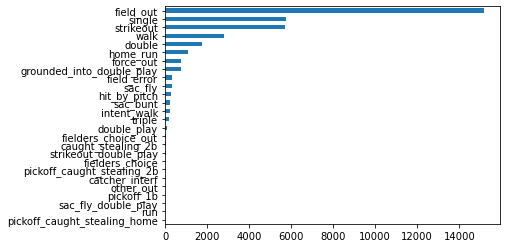

In [36]:
atkbo_1118_statcast['events'].value_counts().sort_values(
    ascending=True).plot(kind='barh')

description column에 기록된 값의 분포 확인

<AxesSubplot:>

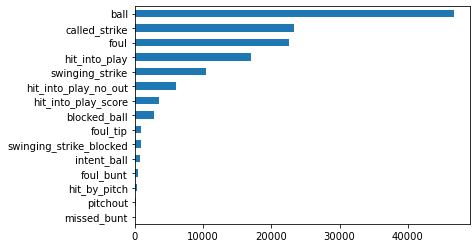

In [37]:
atkbo_1118_statcast['description'].value_counts(
).sort_values(ascending=True).plot(kind='barh')

pitch_name column에 기록된 값의 분포 확인

<AxesSubplot:>

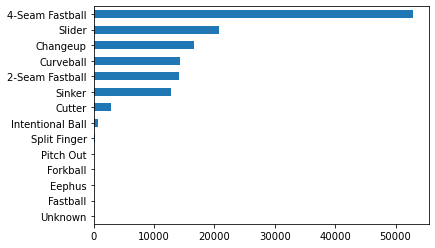

In [38]:
atkbo_1118_statcast['pitch_name'].value_counts(
).sort_values(ascending=True).plot(kind='barh')

## 데이터 전처리

#### 가설
kbo에서 우수한 활약을 보인 선수들은 MLB에서 제구력이 뛰어날 것이다

- 1. 대상은 누구인가?
- 2. 우수한 활약의 기준은 무엇인가?
- 3. 제구력은 어떻게 측정할 것인가?

이 가설은 MLB와 KBO 모두에서 투구 기록이 존재하는 투수만 가능 

In [39]:
atkbo_1118_kboregssn.head(10)

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
5,니퍼트,2016,두산,2.95,701,151,15,57,9,142,NaN
6,니퍼트,2017,두산,4.06,782,175,20,77,10,161,NaN
7,니퍼트,2018,KT,4.25,765,209,26,39,9,165,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN


In [40]:
atkbo_1118_mlbtot.head(10)

,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
5,스와잭,2017.0,2.33,2.2,303.0,58.0,6.0,22.0,2.0,91.0,1.03,0.286,2.74,0.155,0.439,0.485,0.145,0.142,0.500
6,듀브론트,2012.0,4.86,1.3,709.0,162.0,24.0,71.0,5.0,167.0,1.45,0.312,4.37,0.234,0.437,0.635,0.086,0.096,0.442
7,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
8,비야누에바,2011.0,4.04,1.2,454.0,103.0,11.0,32.0,4.0,68.0,1.26,0.271,4.10,0.219,0.356,0.462,0.151,0.078,0.433
9,비야누에바,2014.0,4.64,1.2,343.0,89.0,6.0,19.0,3.0,72.0,1.39,0.342,3.13,0.202,0.413,0.474,0.161,0.113,0.486


In [41]:
atkbo_1118_statcast.head(10)

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,...,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,...,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,...,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,...,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,...,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,...,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트
5,2010-10-09,80.8,150289.0,430962,NaN,foul_tip,13.0,L,R,NaN,...,-1.233,2.059,-10.897,18.539,-20.286,NaN,NaN,NaN,Changeup,니퍼트
6,2010-10-09,92.0,150289.0,430962,NaN,ball,9.0,L,R,NaN,...,0.510,1.722,-6.251,27.786,-10.031,NaN,NaN,NaN,4-Seam Fastball,니퍼트
7,2010-10-09,92.5,430632.0,430962,field_out,hit_into_play,13.0,L,R,line_drive,...,-1.010,2.212,-8.279,26.466,-8.376,NaN,NaN,NaN,4-Seam Fastball,니퍼트
8,2010-10-09,91.2,430632.0,430962,NaN,ball,13.0,L,R,NaN,...,-0.106,1.418,-9.239,25.490,-13.556,NaN,NaN,NaN,4-Seam Fastball,니퍼트
9,2010-10-09,91.8,430632.0,430962,NaN,ball,11.0,L,R,NaN,...,-1.426,2.971,-12.090,25.659,-15.250,NaN,NaN,NaN,2-Seam Fastball,니퍼트


데이터마다 기록된 column이 다르지만 `pitcher_name`이라는 column에 투수의 이름 정보가 기록되어있는 것은 동일하다. 

데이터별로 고유 투수 이름을 확인하기 위해 판다스에서 제공되는 pd.Series.unique() 이용

In [43]:
print('KBO :', len(atkbo_1118_kboregssn['pitcher_name'].unique()))
print('MLB :', len(atkbo_1118_mlbtot['pitcher_name'].unique()))
print('KBO :', len(atkbo_1118_statcast['pitcher_name'].unique()))

KBO : 62
MLB : 60
KBO : 60


In [71]:
target = \
    set(atkbo_1118_kboregssn['pitcher_name'].unique()) & \
    set(atkbo_1118_mlbtot['pitcher_name'].unique()) & \
    set(atkbo_1118_statcast['pitcher_name'].unique())

In [72]:
inter

{'니퍼트',
 '다이아몬드',
 '듀브론트',
 '레나도',
 '레온',
 '레이예스',
 '레일리',
 '로저스',
 '루카스',
 '린드블럼',
 '마야',
 '맨쉽',
 '베렛',
 '보니야',
 '보우덴',
 '볼스테드',
 '비야누에바',
 '산체스',
 '샘슨',
 '서캠프',
 '세든',
 '소사',
 '스와잭',
 '스틴슨',
 '아담',
 '아델만',
 '앨버스',
 '어센시오',
 '어윈',
 '에반',
 '오간도',
 '오설리반',
 '올슨',
 '울프',
 '웨버',
 '웹스터',
 '윌슨',
 '이브랜드',
 '지크',
 '코엘로',
 '코프랜드',
 '클로이드',
 '탈보트',
 '토마스',
 '티포드',
 '팻딘',
 '플란데',
 '피가로',
 '피노',
 '피어밴드',
 '해커',
 '허프',
 '험버',
 '헤일',
 '헥터',
 '후랭코프',
 '휠러'}

In [74]:
print(type(target))

target = sorted(list(target))

print(type(target))

print(len(target))

<class 'set'>
<class 'list'>
57


In [75]:
list(target)

['니퍼트',
 '다이아몬드',
 '듀브론트',
 '레나도',
 '레온',
 '레이예스',
 '레일리',
 '로저스',
 '루카스',
 '린드블럼',
 '마야',
 '맨쉽',
 '베렛',
 '보니야',
 '보우덴',
 '볼스테드',
 '비야누에바',
 '산체스',
 '샘슨',
 '서캠프',
 '세든',
 '소사',
 '스와잭',
 '스틴슨',
 '아담',
 '아델만',
 '앨버스',
 '어센시오',
 '어윈',
 '에반',
 '오간도',
 '오설리반',
 '올슨',
 '울프',
 '웨버',
 '웹스터',
 '윌슨',
 '이브랜드',
 '지크',
 '코엘로',
 '코프랜드',
 '클로이드',
 '탈보트',
 '토마스',
 '티포드',
 '팻딘',
 '플란데',
 '피가로',
 '피노',
 '피어밴드',
 '해커',
 '허프',
 '험버',
 '헤일',
 '헥터',
 '후랭코프',
 '휠러']

In [80]:
_idx = atkbo_1118_kboregssn.query('pitcher_name in @target'). \
    groupby('pitcher_name')['year'].idxmin().values
firstyearinkbo_1118 = atkbo_1118_kboregssn.iloc[_idx, :]
firstyearinkbo_1118.head()

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN
10,레나도,2017,삼성,6.80,243,70,11,27,6,28,NaN
11,레온,2016,삼성,11.25,40,16,2,1,1,7,NaN


ERA를 확인할 때, ERA가 낮지만 TBF도 낮으면 ERA값이 낮다고 해서 성적이 좋다고 할 수 없기 때문에 신뢰성을 가질 수 있는 TBF의 기준을 정해야 할 필요가 있음

506.859649122807
512.0


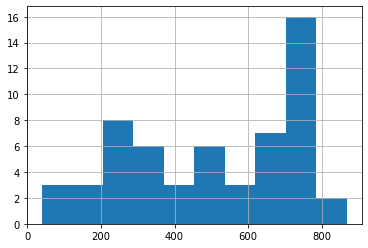

In [90]:
firstyearinkbo_1118['TBF'].hist()
print(firstyearinkbo_1118['TBF'].mean())
print(firstyearinkbo_1118['TBF'].median())

5.065263157894736
4.84


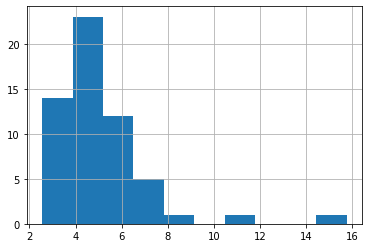

In [94]:
firstyearinkbo_1118['ERA'].hist()
print(firstyearinkbo_1118['ERA'].mean())
print(firstyearinkbo_1118['ERA'].median())

In [167]:
TBF_median = firstyearinkbo_1118['TBF'].median()
ERA_median = firstyearinkbo_1118['ERA'].median()
elite_1118 = firstyearinkbo_1118.query('TBF >= @TBF_median & ERA <= @ERA_median')
elite_1118.reset_index()

,index,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
2,12,레이예스,2013,SK,4.84,751,157,15,91,7,135,NaN
3,14,레일리,2015,롯데,3.91,768,182,20,57,15,134,1988년 06월 29일
4,25,린드블럼,2015,롯데,3.56,861,196,28,52,12,180,1987년 06월 15일
5,37,보우덴,2016,두산,3.80,742,159,17,54,6,160,NaN
6,43,샘슨,2018,한화,4.68,703,144,17,79,5,195,NaN
7,45,세든,2013,SK,2.98,780,169,14,73,11,160,NaN
8,48,소사,2012,KIA,3.54,614,137,9,39,8,104,NaN
9,67,웨버,2014,NC,4.58,512,132,13,42,3,85,NaN


## 모델 구축과 검증
TBF와 ERA의 기준을 정한 후 얻어진 투수들의 데이터를 활용해 평균자책점과 제구력과의 관계를 분석하고 스카우팅 모델 구축

### 1. linear regression analysis
팬그래프 데이터의 경우 투수의 고유한 능력보다는 팀의 수비 능력, 리그 수준, 경기장 요인 등에 영향을 받으므로 스탯캐스트 데이터를 활용

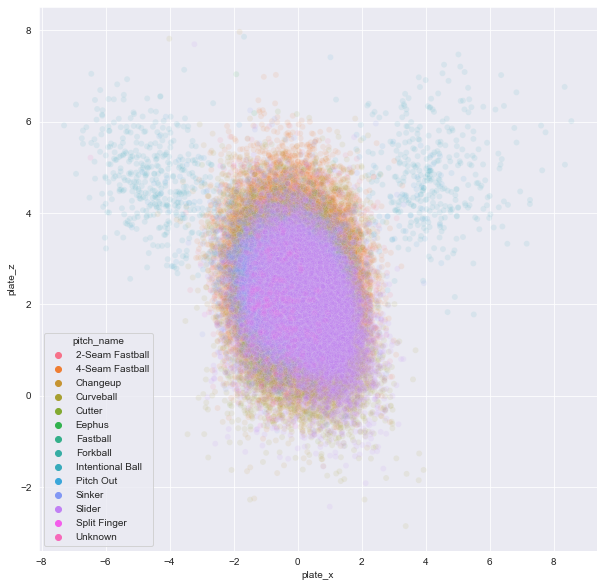

In [168]:
# 제구력 수치화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=atkbo_1118_statcast.sort_values('pitch_name'),
                x='plate_x',
                y='plate_z',
                hue='pitch_name',
                alpha=0.1)
plt.show()

**스트라이크 존 시각화**
구체적으로 명시되어 있진 않지만 주로 스트라이크 존의 범위를 x축(-1, 1), y축(1.5, 3.5)로 추정

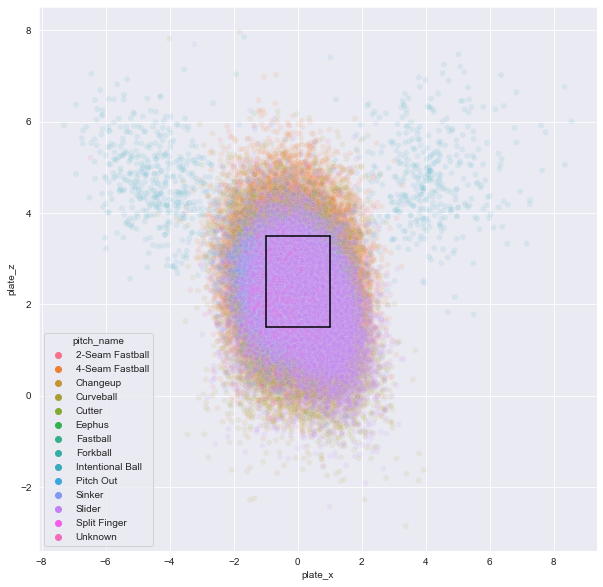

In [169]:
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=atkbo_1118_statcast.sort_values('pitch_name'),
                x='plate_x',
                y='plate_z',
                hue='pitch_name',
                alpha=0.1)
plt.plot([-1,-1], [1.5,3.5], 'black')
plt.plot([-1,1], [1.5,1.5], 'black')
plt.plot([-1,1], [3.5,3.5], 'black')
plt.plot([1,1], [1.5,3.5], 'black')
plt.show()

statcast의 description column에는 투구별 결과가 기록되어 있다.

그 중 `called_strike` 투구 확인(스트라이크)

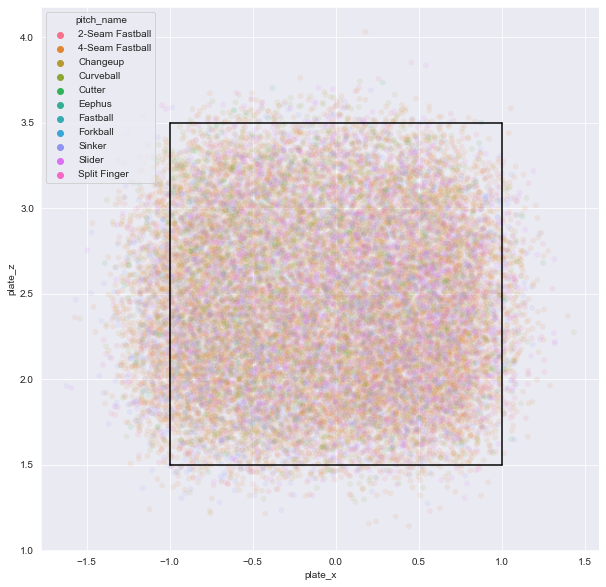

In [170]:
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=atkbo_1118_statcast.
                sort_values('pitch_name').
                query('description == "called_strike"'),
                x='plate_x',
                y='plate_z',
                hue='pitch_name',
                alpha=0.1)
plt.plot([-1,-1], [1.5,3.5], 'black')
plt.plot([-1,1], [1.5,1.5], 'black')
plt.plot([-1,1], [3.5,3.5], 'black')
plt.plot([1,1], [1.5,3.5], 'black')
plt.show()

스트라이크 판정을 받은 경우에서 가장자리에 위치한 경우를 추출

In [171]:
edgepitches = \
(atkbo_1118_statcast.query(
'(0.8 <= plate_x <= 1.2 & 1.3 <= plate_z <= 3.7) | \
 (-1.2 <= plate_x <= -0.8 & 1.3 <= plate_z <= 3.7) | \
 (-0.8 <= plate_x <= 0.8 & 3.3 <= plate_z <= 3.7) | \
 (-0.8 <= plate_x <= 0.8 & 1.3 <= plate_z <= 1.7)')). \
query('pitch_name.notnull()', engine = 'python').\
query('description == "called_strike"')

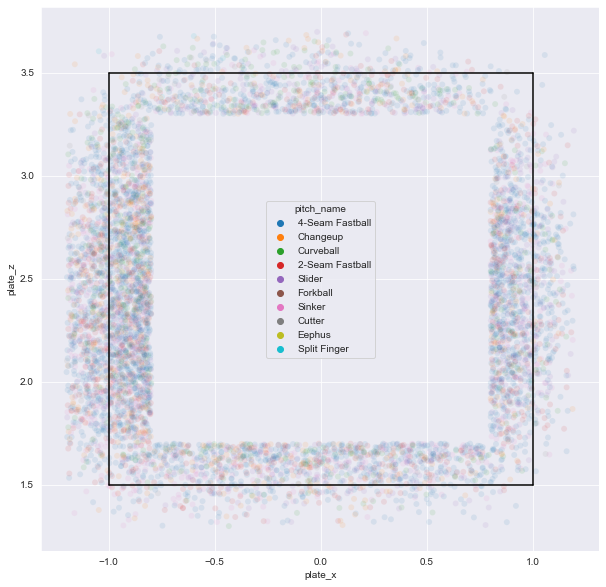

In [172]:
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data = edgepitches,
                x='plate_x',
                y='plate_z',
                hue='pitch_name',
                alpha=0.1)
plt.plot([-1,-1], [1.5,3.5], 'black')
plt.plot([-1,1], [1.5,1.5], 'black')
plt.plot([-1,1], [3.5,3.5], 'black')
plt.plot([1,1], [1.5,3.5], 'black')
plt.show()

가장자리에 분포한 스트라이크 판정을 받은 투구 중 구종 비율이 10%가 넘는 것을 유효한 구종이라고 정의

해당 구종의 개수로 제구력 평가

In [173]:
(edgepitches[['pitcher_name', 'pitch_name', 'game_date']].
groupby(['pitcher_name', 'pitch_name']).
count().
head(10))

game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball          1
             4-Seam Fastball         18
             Changeup                 3
             Curveball                3
다이아몬드        2-Seam Fastball          7
             4-Seam Fastball        155
             Changeup                10
             Curveball               36
듀브론트         2-Seam Fastball         80
             4-Seam Fastball        194

In [174]:
(edgepitches[['pitcher_name', 'pitch_name', 'game_date']].
groupby(['pitcher_name', 'pitch_name']).
count().
groupby('pitcher_name').\
 apply(lambda x: x/x.sum()).
head(10))

game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball   0.040000
             4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        2-Seam Fastball   0.033654
             4-Seam Fastball   0.745192
             Changeup          0.048077
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853

우연에 의한 결과를 배제하기 위해 비중이 10% 이상인 구종만 선택

In [175]:
(edgepitches[['pitcher_name', 'pitch_name', 'game_date']].
groupby(['pitcher_name', 'pitch_name']).
count().
groupby('pitcher_name').\
 apply(lambda x: x/x.sum()). \
 query('game_date >= 0.1').
head(10))

game_date
pitcher_name pitch_name                
니퍼트          4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        4-Seam Fastball   0.745192
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853
             Changeup          0.107330
             Curveball         0.102094
레나도          4-Seam Fastball   0.631579

투수별 행의 개수를 구하면 투수별 제구력을 평가하는 지표 완성 

In [176]:
coordedge = (edgepitches[['pitcher_name', 'pitch_name', 'game_date']].
             groupby(['pitcher_name', 'pitch_name']).
             count().
             groupby('pitcher_name').
             apply(lambda x: x/x.sum()).
             query('game_date >= 0.1').
             groupby('pitcher_name').
             count())   

In [177]:
coordedge = coordedge.reset_index().rename(columns = {'game_date' : 'num_pitches'})
coordedge.head()

,pitcher_name,num_pitches
0,니퍼트,3
1,다이아몬드,2
2,듀브론트,4
3,레나도,2
4,레온,2


제구력에 따라서 KBO에서 ERA가 어떻게 변하는지 확인

<AxesSubplot:title={'center':'ERA'}, xlabel='num_pitches'>

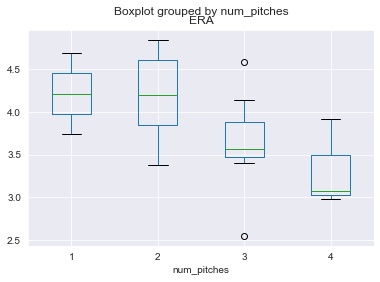

In [179]:
elite_1118 = elite_1118.reset_index()
elite_1118 = elite_1118.merge(coordedge, on = 'pitcher_name')
elite_1118.boxplot('ERA', 'num_pitches')

제구력 지표가 높을수록 ERA가 감소하는 것을 확인, 이 경향이 통계적으로 유의한지 선형 회귀분석 실시

In [186]:
import statsmodels.api as sm

y = elite_1118.ERA.values
x = sm.add_constant(elite_1118.num_pitches.values)

model = sm.OLS(y, x)
result = model.fit()
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     5.861
Date:                Tue, 17 Aug 2021   Prob (F-statistic):             0.0277
Time:                        20:43:18   Log-Likelihood:                -14.248
No. Observations:                  18   AIC:                             32.50
Df Residuals:                      16   BIC:                             34.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7731      0.414     11.543      0.000       3.896       5.650
x1            -0.3629      0.150     -2.421      0.028      -0.681      -0.045
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.346
Skew:                          -0.120   Prob(JB):                        0.841
Kurtosis:                       2.365   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**제구력 지표가 유의하므로 외국인 선수를 스카우트할 때 이용**

### 아웃 확률 추정 
대회의 목표는 스카우팅하고자 하는 2명의 투수를 제시하는 것인데, 제구력 점수가 동점인 선수가 3명 이상 나오는 경우 추가 선발 기준 필요

**아웃 확률** 사용

한 이닝에서 3번의 아웃을 잡아내는데, 그 때까지 타자들을 계속 상대하게 된다. 이 때 3아웃을 잡아내기까지 상대한 타자의 수는 음이항분포를 따른다.

statcast의 events column에서 결과를 확인할 수 있는데, 결측값을 지우게 되면 각 타석 별 결과를 알 수 있다.

In [194]:
atkbo_1118_statcast[['batter', 'events', 'description']]. \
query('events.notnull()', engine = 'python'). \
head(10)

,batter,events,description
0,425834.0,field_out,hit_into_play
1,150289.0,home_run,hit_into_play_score
7,430632.0,field_out,hit_into_play
10,446481.0,single,hit_into_play_no_out
12,446334.0,field_out,hit_into_play
15,116338.0,field_out,hit_into_play
19,110029.0,field_out,hit_into_play
25,435062.0,field_out,hit_into_play
29,488721.0,home_run,hit_into_play_score
31,430948.0,field_out,hit_into_play


해당 데이터를 순차적으로 아래에서 위로 순회하면서 상대한 타자 수 확인 

In [202]:
def recordinning(key, dic) : 
    if dic.get(key) == None : 
        dic[key] = 1
    else : 
        dic[key] += 1 
    return dic

def getinningresult(df) : 
    battercount = 0
    battercounttemp = 0
    outs = ['out' ,'out', 'out']
    inningdict = {}
    for idx in range(len(df)-1, -1, -1) :
        battercount += 1 
        if 'out' in df.events.iloc[idx] : 
            outs.pop()
        # out이 3번 나오면 기록
        if len(outs) == 0 :
            _key = f'I_{battercount - battercounttemp}'
            inningdict = recordinning(_key, inningdict)
            battercounttemp = battercount
            if idx != 0 : 
                outs = ['out', 'out', 'out']
    if len(outs) != 0 : 
        _key = f'I_{battercount - battercounttemp + len(outs)}'
        inningdict = recordinning(_key, inningdict)
    return pd.DataFrame(data = dict(sorted(inningdict.items())), index = [0])

In [203]:
mlb_1118_inningsummary = (atkbo_1118_statcast.query('events.notnull()', engine = 'python').
                          groupby(['pitcher_name', 'game_date']).
                          apply(getinningresult))
mlb_1118_inningsummary.head(20)

I_6  I_7  I_4  I_5  I_8  I_3  I_12  I_10  I_9  \
pitcher_name game_date                                                     
니퍼트          2010-06-06 0  2.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-09 0  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-17 0  NaN  NaN  1.0  1.0  1.0  NaN   NaN   NaN  NaN   
             2010-06-23 0  1.0  1.0  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-06-30 0  1.0  NaN  1.0  NaN  NaN  1.0   NaN   NaN  NaN   
             2010-07-05 0  NaN  NaN  1.0  NaN  NaN  NaN   1.0   NaN  NaN   
             2010-07-09 0  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-07-19 0  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-09-04 0  NaN  NaN  1.0  NaN  NaN  1.0   NaN   NaN  NaN   
             2010-09-05 0  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN  NaN   
             2010-09-10 0  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-09-14 0  1.0  NaN  2.0  NaN  NaN  2.0   NaN   NaN  NaN   
             2010-09-19 0  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-09-20 0  1.0  NaN  NaN  NaN  NaN  1.0   NaN   NaN  NaN   
             2010-09-22 0  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-09-25 0  NaN  NaN  1.0  NaN  NaN  1.0   NaN   NaN  NaN   
             2010-10-01 0  NaN  NaN  1.0  NaN  NaN  1.0   NaN   NaN  NaN   
             2010-10-03 0  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN  NaN   
             2010-10-09 0  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN  NaN   
다이아몬드        2011-07-18 0  NaN  2.0  1.0  1.0  NaN  3.0   NaN   NaN  NaN   

                           I_11  I_14  I_13  I_17  I_16  
pitcher_name game_date                                   
니퍼트          2010-06-06 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-09 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-17 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-23 0   NaN   NaN   NaN   NaN   NaN  
             2010-06-30 0   NaN   NaN   NaN   NaN   NaN  
             2010-07-05 0   NaN   NaN   NaN   NaN   NaN  
             2010-07-09 0   NaN   NaN   NaN   NaN   NaN  
             2010-07-19 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-04 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-05 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-10 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-14 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-19 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-20 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-22 0   NaN   NaN   NaN   NaN   NaN  
             2010-09-25 0   NaN   NaN   NaN   NaN   NaN  
             2010-10-01 0   NaN   NaN   NaN   NaN   NaN  
             2010-10-03 0   NaN   NaN   NaN   NaN   NaN  
             2010-10-09 0   NaN   NaN   NaN   NaN   NaN  
다이아몬드        2011-07-18 0   NaN   NaN   NaN   NaN   NaN

pitcher_name 기준으로 groupby를 한 후 column별 합을 구하면 투수별 MLB에서의 모든 경기 기록 합산 

In [211]:
mlb_1118_inningsummary = (mlb_1118_inningsummary.
                         groupby('pitcher_name').
                         sum()[sorted(mlb_1118_inningsummary.columns)])

mlb_1118_inningsummary.head()

,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9
pitcher_name,,,,,,,,,,,,,,
니퍼트,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0
다이아몬드,6.0,1.0,0.0,0.0,1.0,0.0,0.0,105.0,65.0,60.0,33.0,25.0,22.0,6.0
듀브론트,9.0,1.0,1.0,0.0,0.0,0.0,0.0,146.0,150.0,79.0,63.0,29.0,26.0,14.0
레나도,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,25.0,15.0,9.0,10.0,3.0,1.0
레온,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,6.0,4.0,3.0,1.0,0.0


elite_1118에 기록된 투수들에 대한 정보만 추출

In [212]:
mlb_1118_inningsummary = mlb_1118_inningsummary.reset_index()

elite_1118_inningsummary = (mlb_1118_inningsummary.
                           query('pitcher_name in @elite_1118.pitcher_name').
                           reset_index(drop = True))

elite_1118_inningsummary

,pitcher_name,I_10,I_11,I_12,I_13,I_14,I_16,I_17,I_3,I_4,I_5,I_6,I_7,I_8,I_9
0,니퍼트,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,14.0,2.0,6.0,3.0,1.0,0.0
1,다이아몬드,6.0,1.0,0.0,0.0,1.0,0.0,0.0,105.0,65.0,60.0,33.0,25.0,22.0,6.0
2,레이예스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,43.0,24.0,17.0,10.0,9.0,5.0
3,레일리,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,6.0,6.0,1.0,3.0,2.0
4,린드블럼,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,41.0,35.0,15.0,9.0,2.0,1.0
5,보우덴,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,49.0,12.0,21.0,6.0,2.0,1.0
6,샘슨,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,21.0,13.0,20.0,8.0,5.0,2.0
7,세든,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,11.0,6.0,4.0,3.0,1.0
8,소사,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,5.0,11.0,11.0,2.0,2.0,0.0
9,웨버,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,2.0,2.0,0.0
